In [1]:
import pandas as pd 
import numpy as np

In [2]:
masterData_row = pd.read_csv('dataMachine/TFT_Challenger_MatchData.csv')

In [3]:
# 데이터 설명 

In [4]:
masterData_row.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4247538593,2142.470703,8,35,1,2134.272217,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [27], 'star': 3}, 'Sona..."
1,KR_4247538593,2142.470703,9,35,2,2134.272217,"{'Blaster': 2, 'Mercenary': 1, 'Rebel': 6, 'Se...","{'Malphite': {'items': [7], 'star': 2}, 'Yasuo..."
2,KR_4247538593,2142.470703,8,34,3,2073.459229,"{'Cybernetic': 1, 'DarkStar': 3, 'Demolitionis...","{'KaiSa': {'items': [99, 2, 23], 'star': 2}, '..."
3,KR_4247538593,2142.470703,8,33,4,1998.146729,"{'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 1,...","{'KaiSa': {'items': [44, 37], 'star': 2}, 'Ann..."
4,KR_4247538593,2142.470703,9,33,5,1986.443237,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {..."


In [5]:
# info 확인 

In [6]:
# 데이터 셋 형태 확인 
masterData_row.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of gameId             object
gameDuration      float64
level               int64
lastRound           int64
Ranked              int64
ingameDuration    float64
combination        object
champion           object
dtype: object>

In [12]:
#na 값 없음을 확인 
masterData_row.isna().sum()

gameId            0
gameDuration      0
level             0
lastRound         0
Ranked            0
ingameDuration    0
combination       0
champion          0
dtype: int64

In [9]:
# float64, int64에 대한 행변환? 
- #finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)
- #np.iinfo(np.int16) iinfo(min=-32768, max=32767, dtype=int16)
- #np.iinfo(np.int8) iinfo(min=-128, max=127, dtype=int8)

In [11]:
masterData_row.describe()

,gameDuration,level,lastRound,Ranked,ingameDuration
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,2159.372816,7.892924,33.751584,4.499981,1885.009724
std,150.723247,0.764493,4.764066,2.291310,266.917652
min,38.888447,1.000000,2.000000,1.000000,38.888447
25%,2069.660400,8.000000,31.000000,2.500000,1714.793335
50%,2156.798340,8.000000,34.000000,4.000000,1905.148804
75%,2249.689941,8.000000,37.000000,6.500000,2070.903687
max,2772.365479,9.000000,49.000000,8.000000,2764.172363


In [19]:
masterData_row['level'] = masterData_row['level'].astype(np.int8)
masterData_row['level'] = masterData_row['lastRound'].astype(np.int8)
masterData_row['level'] = masterData_row['Ranked'].astype(np.int8)

In [25]:
masterData_row['gameDuration'] = masterData_row['gameDuration'].astype(np.float32)
masterData_row['ingameDuration'] = masterData_row['ingameDuration'].astype(np.float32)

In [26]:
masterData_row.describe()

,gameDuration,level,lastRound,Ranked,ingameDuration
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,2159.358154,4.499981,33.751584,4.499981,1885.009521
std,150.721970,2.291310,4.764066,2.291310,266.921661
min,38.875000,1.000000,2.000000,1.000000,38.875000
25%,2070.000000,2.500000,31.000000,2.500000,1715.000000
50%,2156.000000,4.000000,34.000000,4.000000,1905.000000
75%,2250.000000,6.500000,37.000000,6.500000,2070.000000
max,2772.000000,8.000000,49.000000,8.000000,2764.000000


In [ ]:
# object형의 describe 

In [7]:
masterData_row.describe(include ='object').T

,count,unique,top,freq
gameId,79999,10000,KR_4347628663,8
combination,79999,22960,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '...",3086
champion,79999,79918,{},79


In [ ]:
# 시너지와 챔피언의 경우 요소안에 keu-value 값으로 또 나누어져있기에 데이터 학습하기에는 적정하지 않다. -> 작업 중 

In [27]:
# EDA & 분석 

In [ ]:
1. gameDuration,level,lastRound	Ranked,ingameDuration 분석 

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x27442b18dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x27442b244c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27442b18a60>],
 'medians': [<matplotlib.lines.Line2D at 0x27442b24b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x27442b24eb0>],
 'means': []}

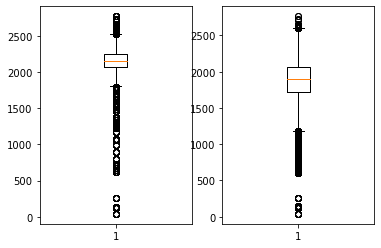

In [56]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.boxplot(masterData_row.gameDuration)
ax2.boxplot(masterData_row.ingameDuration)

In [57]:
#레벨별 그룹화하여 평균 게임 시각(1-8등까지 정해진 총 시간) 및 게임이 끝난 시각(자신이 죽은 시각)

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ranked', ylabel='gameDuration'>

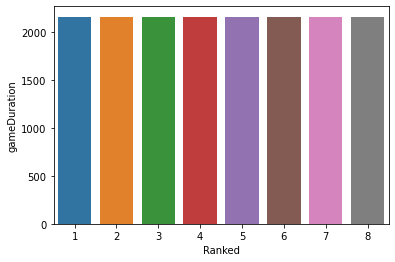

In [63]:
a = masterData_row.groupby('Ranked')['gameDuration'].mean()
sns.barplot(a.index, a)

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ranked', ylabel='ingameDuration'>

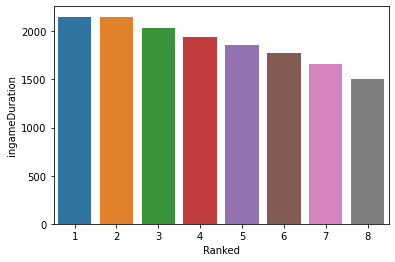

In [64]:
b = masterData_row.groupby('Ranked')['ingameDuration'].mean()
sns.barplot(b.index, b)

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lastRound', ylabel='Ranked'>

<Figure size 432x288 with 0 Axes>

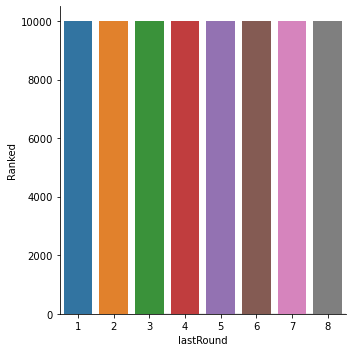

In [72]:
fig = plt.figure()
sns.displot(masterData_row.lastRound)
sns.barplot(masterData_row.Ranked.value_counts().index, masterData_row.Ranked.value_counts())

In [46]:
masterData_row.level.value_counts()

1    10000
2    10000
3    10000
4    10000
5    10000
7    10000
8    10000
6     9999
Name: level, dtype: int64

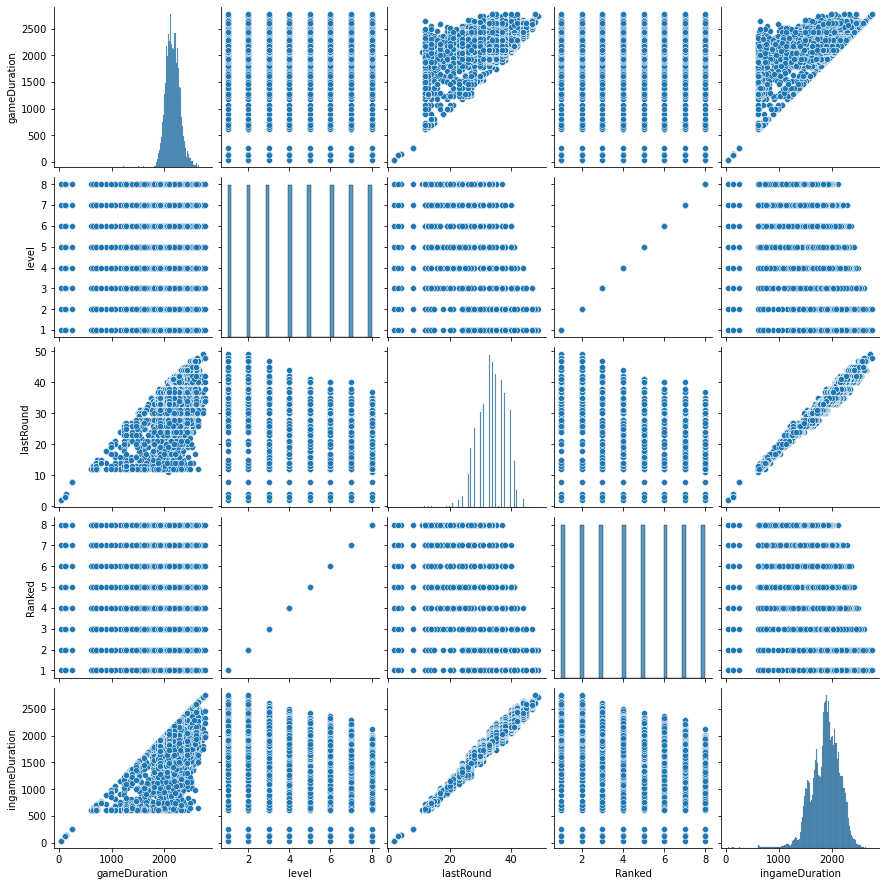

In [43]:
sns.pairplot(masterData_row)

11/02 목표**
시각화에 대한 그룹화 
등수  1-8 까지 나눈 것과 1-4,4-8 나눈 것 시각화 하기 